# SlideRule ATL03 Subsetting: Interactive Tutorial

SlideRule is an on-demand science data processing service that runs in on Amazon Web Services and responds to REST API calls to process and return science results.  SlideRule was designed to enable researchers and other data systems to have low-latency access to custom-generated, high-level, analysis-ready data products using processing parameters supplied at the time of the request. 

[Documentation for using SlideRule](https://slideruleearth.io/rtd) is available from the [project website](https://slideruleearth.io) 

### Background
SlideRule can subset ATL03 geolocated photon height data _on-demand_ and calculate photon classifications to suit different needs.

### Jupyter and SlideRule
[Jupyter widgets](https://ipywidgets.readthedocs.io) are used to set parameters for the SlideRule API.  

Regions of interest for submitting to SlideRule are drawn on a [ipyleaflet](https://ipyleaflet.readthedocs.io) map.  
The results from SlideRule can be displayed on the interactive [ipyleaflet](https://ipyleaflet.readthedocs.io) map along with additional contextual layers.

#### Load necessary packages

In [5]:
import warnings
# turn off warnings for demo
warnings.filterwarnings('ignore')# autoreload

from sliderule import icesat2, ipysliderule, sliderule, io, earthdata
import geopandas
import logging

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initiate SlideRule API
- Sets the URL for accessing the SlideRule service
- Builds a table of servers available for processing data

In [6]:
# set the url for the sliderule service
# set the logging level
icesat2.init("slideruleearth.io", loglevel=logging.WARNING)

### Set options for making science data processing requests to SlideRule

SlideRule can provide different sources for photon classification. This is useful for example in cases using the photon returns to estimate ocean or lake bathymetry, vegetated canopy heights, or ground position in the presence of a vegetated canopy. 
- ATL03 photon confidence values, based on algorithm-specific classification types for land, ocean, sea-ice, land-ice, or inland water
- [ATL08 Land and Vegetation Height product](https://nsidc.org/data/atl08) photon classification
- Experimental YAPC (Yet Another Photon Classification) photon-density-based classification

In [7]:
# display widgets for setting SlideRule parameters
SRwidgets = ipysliderule.widgets()
SRwidgets.set_atl03_defaults()
SRwidgets.VBox(SRwidgets.atl03())

### Interactive Mapping with Leaflet

Interactive maps within the SlideRule python API are built upon [ipyleaflet](https://ipyleaflet.readthedocs.io).

#### Leaflet Basemaps and Layers

There are 3 projections available within SlideRule for mapping ([Global](https://epsg.io/3857), [North](https://epsg.io/5936) and [South](https://epsg.io/3031)).  There are also contextual layers available for each projection.

<table>
  <tbody>
    <tr>
      <th align='center' max-width="30%"><a href="https://epsg.io/3857">Global (Web Mercator, EPSG:3857)</a></th>
      <th align='center' max-width="30%"><a href="https://epsg.io/5936">North (Alaska Polar Stereographic, EPSG:5936)</a></th>
      <th align='center' max-width="30%"><a href="https://epsg.io/3031">South (Antarctic Polar Stereographic, EPSG:3031)</a></th>
    </tr>
    <tr>
      <td align='left' valign='top' width="30%">
        <ul style="line-height: 1.5em">
            <li><a href="https://apps.nationalmap.gov/3depdem/">USGS 3DEP Hillshade</a></li>
            <li><a href="https://asterweb.jpl.nasa.gov/gdem.asp">ASTER GDEM Hillshade</a></li>
            <li><a href="https://www.arcgis.com/home/item.html?id=10df2279f9684e4a9f6a7f08febac2a9">ESRI Imagery</a></li>
            <li><a href="http://glims.colorado.edu/glacierdata/">Global Land Ice Measurements from Space (GLIMS)</a></li>
            <li><a href="https://www.glims.org/RGI/">Randolph Glacier Inventory (RGI)</a></li>
        </ul>
       </td>
       <td align='left' valign='top' width="30%">
        <ul style="line-height: 1.5em">
            <li><a href="http://goto.arcgisonline.com/maps/Arctic_Imagery">ESRI Imagery</a></li>
            <li><a href="https://www.pgc.umn.edu/data/arcticdem">ArcticDEM</a></li>
        </ul>
       </td>
       <td align='left' valign='top' width="30%">
        <ul style="line-height: 1.5em">
            <li><a href="https://lima.usgs.gov/">Landsat Image Mosaic of Antarctica (LIMA)</a></li>
            <li><a href="https://nsidc.org/data/nsidc-0280">MODIS Mosaic of Antarctica (MOA)</a></li>
            <li><a href="https://nsidc.org/data/NSIDC-0103">Radarsat Antarctic Mapping Project (RAMP)</a></li>
            <li><a href="https://www.pgc.umn.edu/data/rema">Reference Elevation Model of Antarctica (REMA)</a></li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In addition, most [xyzservice providers](https://xyzservices.readthedocs.io/en/stable/introduction.html) can be added as contextual layers to the global Web Mercator maps

In [8]:
SRwidgets.VBox([
    SRwidgets.projection,
    SRwidgets.layers,
    SRwidgets.raster_functions
])

### Select regions of interest for submitting to SlideRule

Here, we create polygons or bounding boxes for our regions of interest.  
This map is also our viewer for inspecting our SlideRule ICESat-2 data returns.

In [9]:
# Specify region of interest from geojson
# poly_fn = '/Users/titus/BSU/remote_sensing/tutorials/icesat2/karina/RCEW-outline_WGS84.geojson'
# region = sliderule.toregion(poly_fn)["poly"] # symplify 
# region

# # Prepare coordinate lists for plotting the region of interest polygon
# region_lon = [e["lon"] for e in region]
# region_lat = [e["lat"] for e in region]
# region_lon
# # print(region_lat)
# coordinates = []
# for i in range(len(region_lon)):
#     coordinates.append((region_lat[i], region_lon[i]))
# coordinates

# from ipyleaflet import Polygon
# polygon = Polygon(
#     locations=coordinates,
#     color="green",
#     fill_color="green"
# )

# m = Map(center=(43.17, -116.51), zoom=9) # from USDA 
# # m = Map(center=(43.6044, -116.1678), zoom=10) #from chatgpt
# m.add(polygon);

# m

In [10]:
# Specify region of interest from geojson
poly_fn = '/bsuhome/tnde/geoscience/carbon_estimation/shapefiles/RCEW-outline_WGS84_simple.geojson'
region = sliderule.toregion(poly_fn)["poly"] # symplify 
# region

# create ipyleaflet map in specified projection
m = ipysliderule.leaflet(SRwidgets.projection.value, center=(43.17, -116.51), zoom=10)
# m.add_region(
#     regions=[region]#,
#     # color="blue"
# )
# m.map(center=(43.6044, -116.1678), zoom=10)
m.map

ERROR 1: PROJ: proj_create_from_database: Open of /bsuhome/tnde/miniconda3/envs/carbon/share/proj failed


Map(center=[43.17, -116.51], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [11]:
# from ipyleaflet import Map, Marker

# # Create a map
# m = Map(center=(43.6044, -116.1678), zoom=10)

# # Add a marker
# marker = Marker(location=(43.6044, -116.1678), title="Reynolds Creek")
# m.add_layer(marker)

# # Display the map
# m  # Just put this line in a cell by itself


In [12]:
m.add_region(
    regions=[region]#,
    # color="blue"
)
m.add_layer(
    layers=SRwidgets.layers.value,
    rendering_rule=SRwidgets.rendering_rule
)

In [13]:
m.regions

[[{'lon': -116.799, 'lat': 43.06089},
  {'lon': -116.7954, 'lat': 43.06089},
  {'lon': -116.7481, 'lat': 43.06268},
  {'lon': -116.747, 'lat': 43.06295},
  {'lon': -116.7411, 'lat': 43.06456},
  {'lon': -116.7409, 'lat': 43.06469},
  {'lon': -116.7392, 'lat': 43.06591},
  {'lon': -116.7379, 'lat': 43.06712},
  {'lon': -116.7179, 'lat': 43.09706},
  {'lon': -116.7008, 'lat': 43.12889},
  {'lon': -116.6963, 'lat': 43.13834},
  {'lon': -116.696, 'lat': 43.13915},
  {'lon': -116.6922, 'lat': 43.15454},
  {'lon': -116.6881, 'lat': 43.22341},
  {'lon': -116.6881, 'lat': 43.22476},
  {'lon': -116.6947, 'lat': 43.24693},
  {'lon': -116.6954, 'lat': 43.24828},
  {'lon': -116.6958, 'lat': 43.24883},
  {'lon': -116.702, 'lat': 43.2564},
  {'lon': -116.7022, 'lat': 43.25654},
  {'lon': -116.7579, 'lat': 43.2872},
  {'lon': -116.7605, 'lat': 43.28828},
  {'lon': -116.7612, 'lat': 43.28856},
  {'lon': -116.8199, 'lat': 43.31163},
  {'lon': -116.8251, 'lat': 43.31298},
  {'lon': -116.8266, 'lat': 43.

### Inspect list of available granules
- SlideRule will query the [NASA Common Metadata Repository (CMR)](https://cmr.earthdata.nasa.gov/) for ATL03 data within our region of interest

In [14]:
%%time
# sliderule asset and data release
asset = SRwidgets.asset.value
release = SRwidgets.release.value
# find granule for each region of interest
granules_list = []
# for each region of interest
sliderule.logger.warning('No valid regions to run') if not m.regions else None
for poly in m.regions:
    granules = earthdata.cmr(short_name="ATL03",
        polygon=poly,
        time_start=SRwidgets.time_start,
        time_end=SRwidgets.time_end,
        version=release)
    granules_list.extend(granules)
# inspect granules list
print(f'Available granules: {len(granules_list)}')

Available granules: 93
CPU times: user 30 ms, sys: 13.7 ms, total: 43.7 ms
Wall time: 1.13 s


### Transmit requests to SlideRule
- When using the `icesat2` asset, the ICESat-2 ATL03 data are then accessed from the NSIDC AWS s3 bucket in `us-west-2`
- The ATL03 granules is spatially subset within SlideRule to our exact region of interest
- Photon classification parameters can then be extracted or calculated for our ATL03 data
- The completed data is streamed concurrently back and combined into a geopandas GeoDataFrame within the Python client

In [15]:
# build sliderule parameters using latest values from widget
parms = SRwidgets.build_atl03()

# clear existing geodataframe results
elevations = [sliderule.emptyframe()]

# for each region of interest
for poly in m.regions:
    # add polygon from map to sliderule parameters
    parms["poly"] = poly
    # make the request to the SlideRule (ATL03-SR) endpoint
    # and pass it the request parameters to request ATL03 Data
    # elevations.append(icesat2.atl03sp(parms, resources=granules_list))
    elevations.append(icesat2.atl03sp(parms))

gdf = geopandas.pd.concat(elevations)

Exception <-1>: Failure on resource ATL03_20240322123502_00592306_006_01.h5 track 2.1: H5Coro::Future read failure on /gt2r/signal_photons/ph_segment_id
Exception <-1>: Failure on resource ATL03_20240322123502_00592306_006_01.h5 track 2.0: H5Coro::Future read failure on /gt2l/signal_photons/ph_segment_id
Exception <-1>: Failure on resource ATL03_20240322123502_00592306_006_01.h5 track 1.0: H5Coro::Future read failure on /gt1l/signal_photons/ph_segment_id
Exception <-1>: Failure on resource ATL03_20240322123502_00592306_006_01.h5 track 3.0: H5Coro::Future read failure on /gt3l/signal_photons/ph_segment_id
Exception <-1>: Failure on resource ATL03_20240322123502_00592306_006_01.h5 track 1.1: H5Coro::Future read failure on /gt1r/signal_photons/ph_segment_id
Exception <-1>: Failure on resource ATL03_20240322123502_00592306_006_01.h5 track 3.1: H5Coro::Future read failure on /gt3r/signal_photons/ph_segment_id
Exception <-1>: Failure on resource ATL03_20230818104054_09052002_006_02.h5 track 

### Review GeoDataFrame output
Can inspect the columns, number of returns and returns at the top of the GeoDataFrame.

See the [ICESat-2 documentation](https://slideruleearth.io/rtd/user_guide/ICESat-2.html#elevations) for descriptions of each column

In [16]:
print(f'Returned {gdf.shape[0]} records')
gdf.head()
# granules_list
# parms
# region

Returned 45512930 records


,geometry,solar_elevation,pair,cycle,rgt,track,region,sc_orient,segment_dist,segment_id,...,snowcover,atl08_class,atl03_cnf,relief,y_atc,x_atc,landcover,quality_ph,yapc_score,spot
2018-10-31 10:40:43.933584128,POINT (-116.82617 43.31233),-40.142265,1.0,1.0,501.0,1.0,6.0,1.0,1.525020e+07,761394.0,...,255.0,4.0,0.0,0.0,3868.916748,-9.327263,255.0,0.0,255.0,5.0
2018-10-31 10:40:43.935084032,POINT (-116.82611 43.31226),-40.142265,1.0,1.0,501.0,1.0,6.0,1.0,1.525020e+07,761394.0,...,255.0,4.0,0.0,0.0,3874.912598,-1.594958,255.0,0.0,255.0,5.0
2018-10-31 10:40:43.974384128,POINT (-116.82654 43.30972),-40.143349,1.0,1.0,501.0,1.0,6.0,1.0,1.525048e+07,761409.0,...,255.0,4.0,0.0,0.0,3867.009521,1.449963,255.0,0.0,255.0,5.0
2018-10-31 10:40:43.980084224,POINT (-116.8265 43.30939),-40.143425,1.0,1.0,501.0,1.0,6.0,1.0,1.525052e+07,761410.0,...,255.0,4.0,0.0,0.0,3873.765137,-1.409837,255.0,0.0,255.0,5.0
2018-10-31 10:40:43.986384128,POINT (-116.82651 43.309),-40.143559,1.0,1.0,501.0,1.0,6.0,1.0,1.525056e+07,761413.0,...,255.0,4.0,0.0,0.0,3876.729004,1.592792,255.0,0.0,255.0,5.0


In [17]:
gdf.columns
gdf["cycle"]

2018-10-31 10:40:43.933584128     1.0
2018-10-31 10:40:43.935084032     1.0
2018-10-31 10:40:43.974384128     1.0
2018-10-31 10:40:43.980084224     1.0
2018-10-31 10:40:43.986384128     1.0
                                 ... 
2024-09-13 15:59:39.156811008    24.0
2024-09-13 15:59:39.156811008    24.0
2024-09-13 15:59:39.156811008    24.0
2024-09-13 15:59:39.156811008    24.0
2024-09-13 15:59:39.156811008    24.0
Name: cycle, Length: 45512930, dtype: float64

### Add GeoDataFrame to map

For stability of the leaflet map, SlideRule will as a default limit the plot to have up to 10000 points from the GeoDataFrame

GeoDataFrames can be plotted in any available [matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
SRwidgets.variable.value
print(gdf.columns)

Index(['geometry', 'region', 'background_rate', 'pair', 'segment_id',
       'solar_elevation', 'track', 'sc_orient', 'cycle', 'segment_dist', 'rgt',
       'yapc_score', 'height', 'snowcover', 'x_atc', 'y_atc', 'atl08_class',
       'quality_ph', 'relief', 'landcover', 'atl03_cnf', 'spot'],
      dtype='object')


In [ ]:
SRwidgets.VBox([
    SRwidgets.variable,
    SRwidgets.cmap,
    SRwidgets.reverse,
])

In [ ]:
%matplotlib inline
# ATL03 fields for hover tooltip
fields = gdf.leaflet.default_atl03_fields()
gdf.leaflet.GeoData(m.map, column_name=SRwidgets.variable.value, cmap=SRwidgets.colormap,
    max_plot_points=10000, tooltip=True, colorbar=True, fields=fields)
# install handlers and callbacks
gdf.leaflet.set_observables(SRwidgets)
gdf.leaflet.add_selected_callback(SRwidgets.atl03_click_handler)
m.add_region_callback(gdf.leaflet.handle_region)

### Create plots for a single track
- scatter: Will plot data returned by SlideRule for a single RGT, ground track and cycle

In [ ]:
SRwidgets.VBox([
    SRwidgets.plot_classification,
    SRwidgets.rgt,
    SRwidgets.ground_track,
    SRwidgets.cycle,
])

In [ ]:
# Check unique cycle values
print("Available Cycles:", gdf["cycle"].unique())

# Check unique RGT values
print("Available RGTs:", gdf["rgt"].unique())


Available Cycles: [ 1.  4.  7.  9. 10. 12. 13. 14. 15. 16. 17. 18. 19. 21. 22.]
Available RGTs: [ 905.  501.  943.  463. 1347. 1385.   59.]


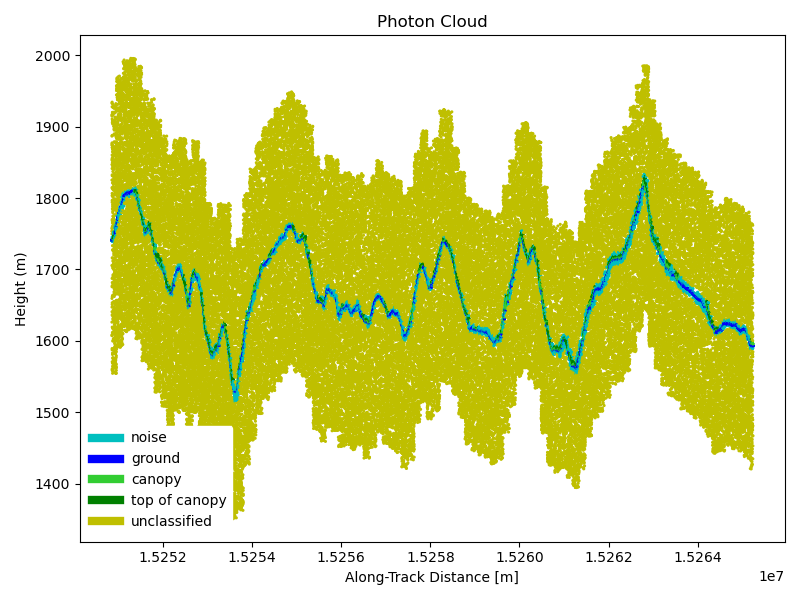

In [ ]:
%matplotlib widget
gdf.icesat2.plot(data_type='atl03', kind='scatter', title='Photon Cloud',
    cmap=SRwidgets.colormap, legend=True, legend_frameon=True,
    classification=SRwidgets.plot_classification.value,
    segments=False, **SRwidgets.plot_kwargs)

### Save GeoDataFrame to output file

In [ ]:
display(SRwidgets.filesaver)

In [ ]:
# append sliderule api version to attributes
version = sliderule.get_version()
parms['version'] = version["server"]["packages"]
parms['commit'] = version["server"]["commit"]
parms['poly'] = region
# save to file in format (HDF5 or netCDF)
io.to_file(gdf, SRwidgets.file,
    format=SRwidgets.format,
    parameters=parms,
    regions=m.regions,
    verbose=True)

In [ ]:
# version = sliderule.get_version()
# version

In [ ]:
# version = sliderule.get_version()
# print(version["server"]["packages"][10])

version = sliderule.get_version()
print(version["server"]["commit"])



v4.8.3-0-g93fc823b


### Read GeoDataFrame from input file

In [ ]:
display(SRwidgets.fileloader)

In [ ]:
# read from file in format (HDF5 or netCDF)
gdf,parms,regions = io.from_file(SRwidgets.file,
    format=SRwidgets.format,
    return_parameters=True,
    return_regions=True)

### Review GeoDataFrame input from file

In [ ]:
gdf.head()

,geometry,region,background_rate,pair,segment_id,solar_elevation,track,sc_orient,cycle,segment_dist,...,height,snowcover,x_atc,y_atc,atl08_class,quality_ph,relief,landcover,atl03_cnf,spot
2018-11-26 21:09:05.579575040,POINT (-116.6917 43.1631),2.0,1.473040e+06,0.0,239559.0,22.218178,1.0,1.0,1.0,4.804055e+06,...,1607.608887,255.0,-9.923435,1007.274902,4.0,0.0,0.0,255.0,0.0,6.0
2018-11-26 21:09:05.579575040,POINT (-116.6917 43.16311),2.0,1.473040e+06,0.0,239559.0,22.218178,1.0,1.0,1.0,4.804055e+06,...,1748.085449,255.0,-9.829745,1006.741089,4.0,0.0,0.0,255.0,0.0,6.0
2018-11-26 21:09:05.579575040,POINT (-116.69171 43.1631),2.0,1.473040e+06,0.0,239559.0,22.218178,1.0,1.0,1.0,4.804055e+06,...,1401.854980,255.0,-10.060610,1008.056702,4.0,0.0,0.0,255.0,0.0,6.0
2018-11-26 21:09:05.579575040,POINT (-116.69171 43.1631),2.0,1.473040e+06,0.0,239559.0,22.218178,1.0,1.0,1.0,4.804055e+06,...,1387.931396,255.0,-10.069866,1008.109619,4.0,0.0,0.0,255.0,0.0,6.0
2018-11-26 21:09:05.579674880,POINT (-116.6917 43.16311),2.0,1.473040e+06,0.0,239559.0,22.218178,1.0,1.0,1.0,4.804055e+06,...,1637.226929,255.0,-9.193459,1007.164307,0.0,0.0,0.0,255.0,0.0,6.0


### Set parameters and add saved regions to map

In [ ]:
SRwidgets.set_values(parms)
m.add_region(regions)